In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
%matplotlib inline

In [2]:
telco_base_data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
telco_base_data.shape

(7043, 21)

In [ ]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [ ]:
# Checking the data types of all the columns
telco_base_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
telco_base_data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

*   Need to convert the SeniorCitizen col to object
*   75% customers have tenure less than 55 months
*  Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

In [4]:
telco_data = telco_base_data.copy()

In [5]:
# Using errors=coerce. It will replace all non-numeric values with NaN.
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges,errors='coerce')
telco_data["SeniorCitizen"] = telco_data["SeniorCitizen"].astype("object") 

In [ ]:
telco_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [ ]:
# Concise Summary of the dataframe, as we have too many columns, we are using the verbose = True mode
telco_base_data.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
telco_data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

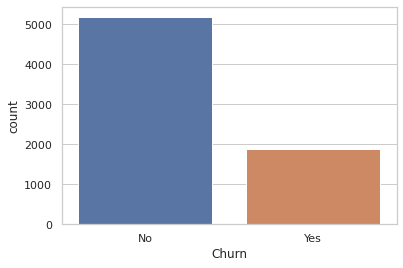

In [ ]:
sns.countplot(x=telco_data["Churn"])

In [ ]:
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is highly imbalanced, ratio = 73:27

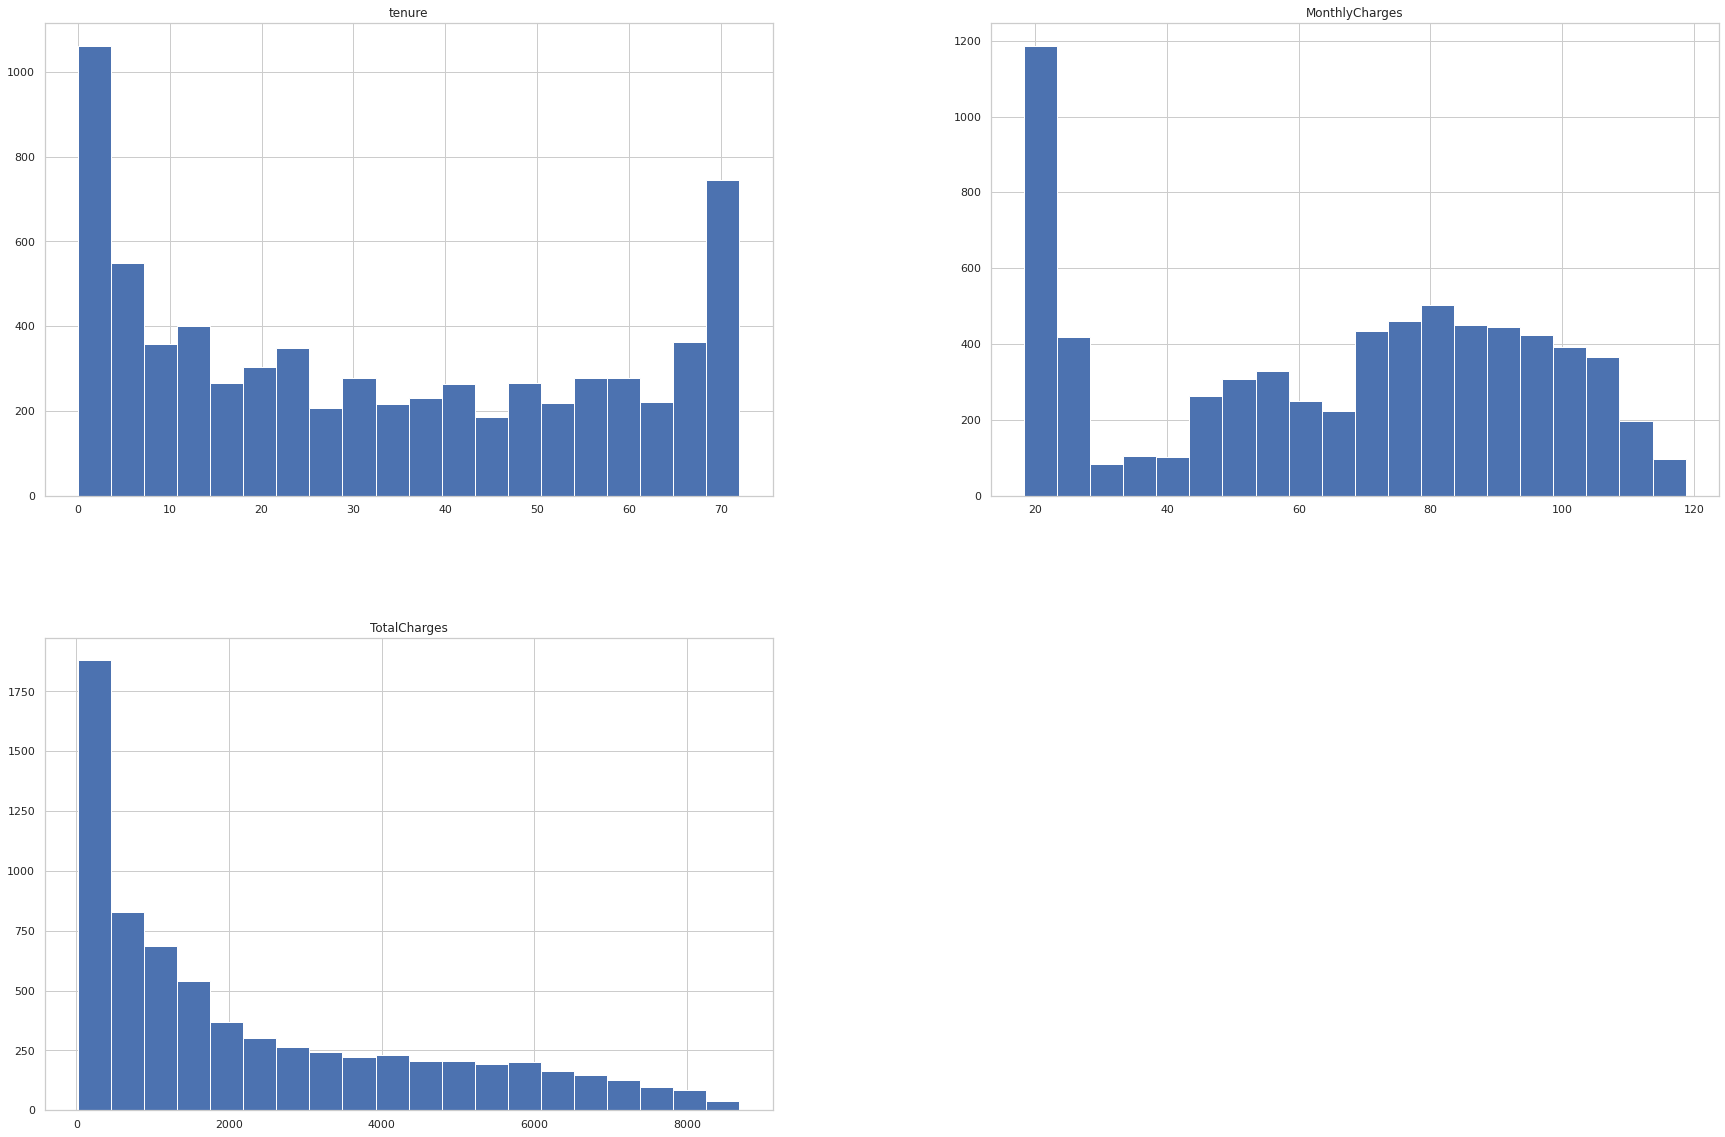

In [ ]:
num_bins = 20
telco_data.hist(bins=num_bins, figsize=(30,20))
plt.savefig("churn_histogram")
plt.show()

In [ ]:
#As we can see there are 11 missing values in TotalCharges column
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
telco_data.dropna(how='any',inplace=True)

In [7]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_data['tenure_group'] = pd.cut(telco_data.tenure, range(1, 80, 12), right=False, labels=labels)
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,13 - 24
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,61 - 72
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1 - 12
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,1 - 12


In [8]:
telco_data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [9]:
telco=telco_base_data.copy()

In [10]:
telco.drop(columns=['Churn'],axis=1,inplace=True)

In [11]:
telco.to_csv('first_tel.csv')

In [12]:
telco_data.drop(columns=['customerID','tenure'],axis=1,inplace=True)

In [13]:
telco_data.to_csv('tel_churn.csv')

In [14]:
#numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
#newdf = telco_data.select_dtypes(include=numerics)
numerical_cols=[col for col in telco_data.columns if telco_data[col].dtype in ['int64', 'float64']]
categorical_cols=[col for col in telco_data.columns if telco_data[col].dtype in['object','category']]

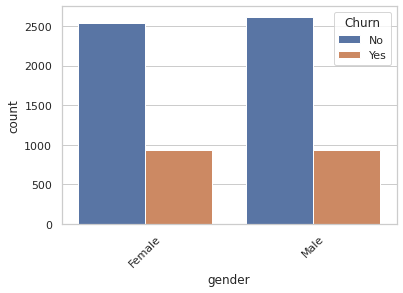

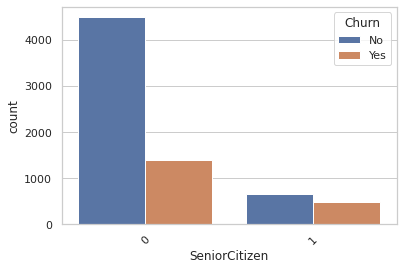

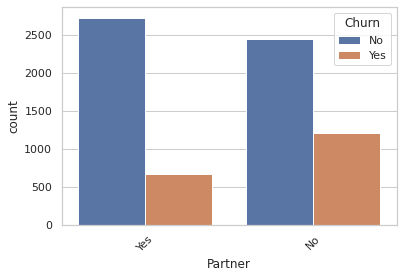

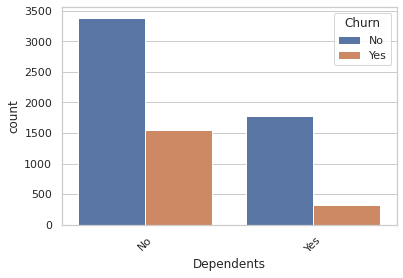

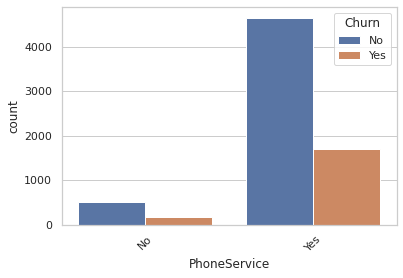

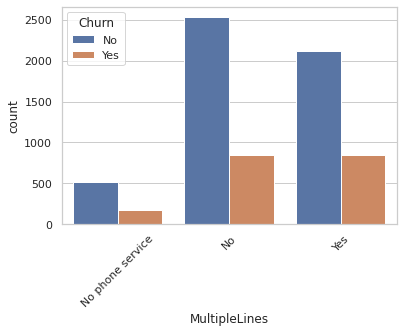

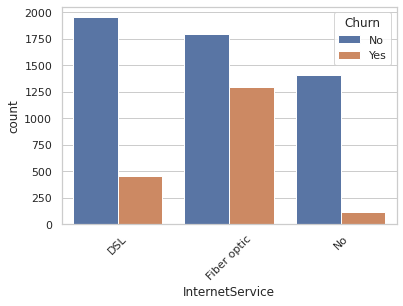

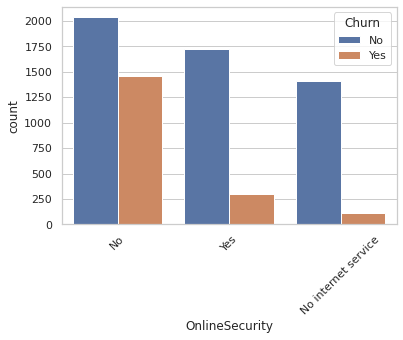

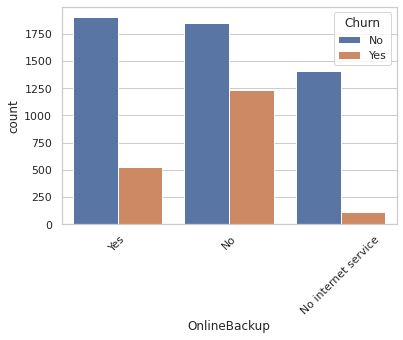

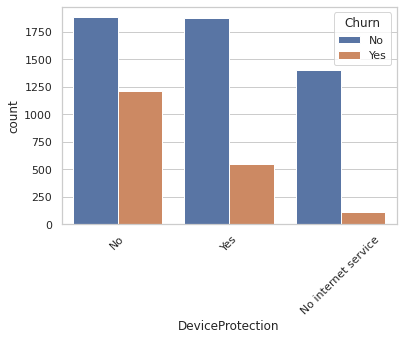

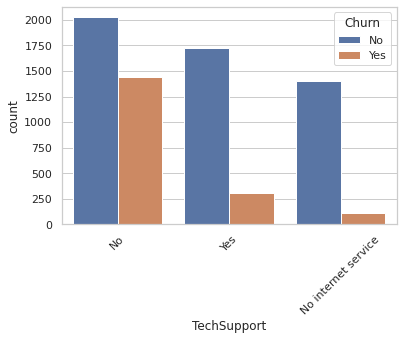

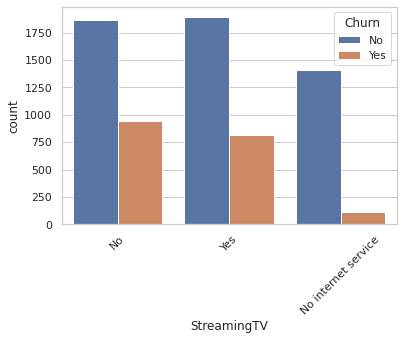

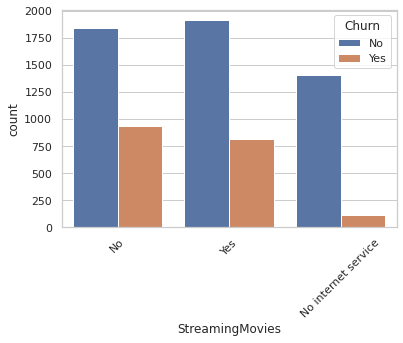

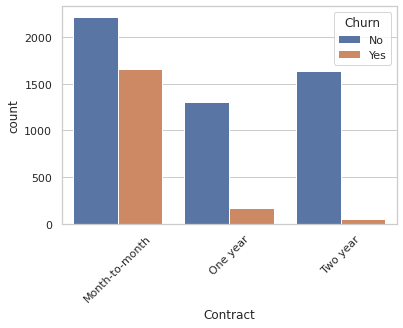

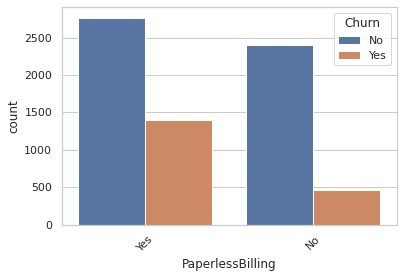

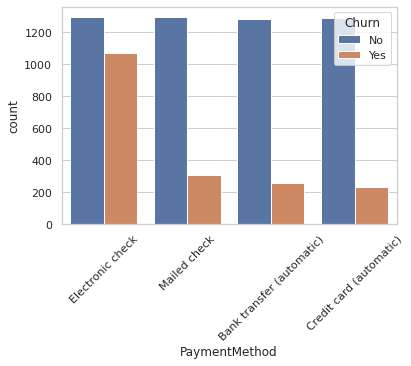

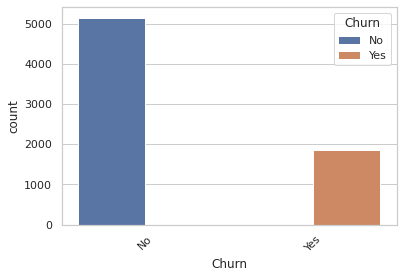

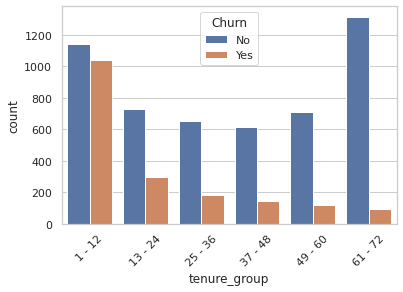

In [15]:
#Data Exploration for categorical
for i, col in enumerate(categorical_cols):
    plt.figure(i)
    sns.countplot(x=col,data=telco_data, hue='Churn')
    plt.xticks(rotation=45)

Observations from the categorical barplots
Genders, seems we have equal number of both males and females, and both show equal amount of churned customers.

Also the majority of customers who don't have a phone service are more than those who have.

Customers who have internet service, prefer mostly DSL or Fiber optic.

There is a common pattern in the features MultipleLines, InternetService, OnlineSecurity, OnlineBackup, TechSupport. most of the customers prefer not to have access to these features than those who have.

In general customers prefer month-to-month contracts compared to other types such as two year or one year contracts.

Finally, most customers would rather have Paperless billing than any other form and they use all the different forms of banking transactions such with Electronic Check(the majority)


In [16]:
telco_data['Churn']=np.where(telco_data.Churn == 'Yes',1,0)

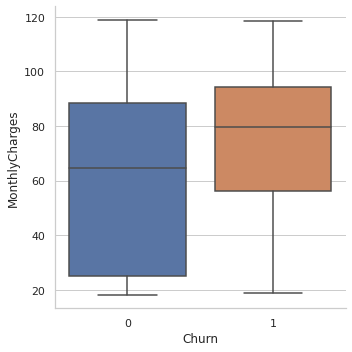

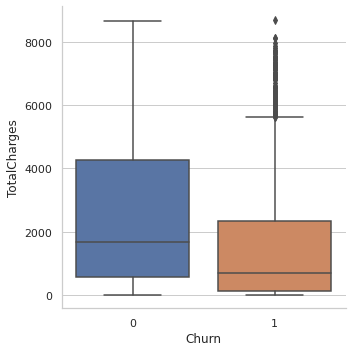

In [17]:
sns.catplot(data=telco_data, x="Churn", y='MonthlyCharges', kind="box")
sns.catplot(data=telco_data, x="Churn", y='TotalCharges', kind="box")
plt.show()

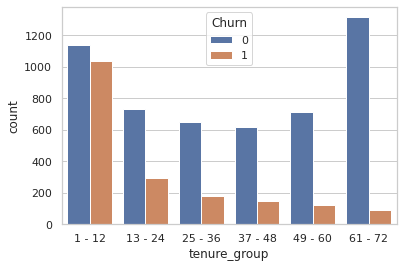

In [18]:
sns.countplot(x='tenure_group',data=telco_data,hue='Churn')
plt.show()

For both numerical variables MonthyCharges and TotalCharges , the Churn follows the same pattern, most customers leave very early and with small total charges.
The opposite happens with the MonthlyCharges, customers who Churn, will leave the company when the monthly charges are rising above 80 dollars.
if we combine the insights of 3 parameters i.e. Tenure_group, Monthly Charges & Total Charges :- Higher Monthly Charge at lower tenure results into lower Total Charges. Hence, all these 3 factors: Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

In [ ]:
sns.set(font_scale=1)

for i in range(len(categorical_cols)):
    
    counts = telco_data.groupby([categorical_cols[i],'Churn']).size().unstack()
    
    
    ax = (counts.T*100.0 / counts.T.sum()).T.plot(
        kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7))

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.0f} %'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')


*  Non Senior customers are prone to leave the company compared to seniors

*  The customers who use fiber optic as InternetService, have the highest churn rate compared to other internetService methods.

*  Customers who don't use or don't have OnlineSecurity, OnlineBackup, OnlineProtection and TechSupport will show higher probability to Churn compared to the rest of the respective groups. Moreover the features StreamingMovies and StreamingTV show the same churn rate
*   Customers who prefer PaperlessBilling have higher Churn probability than those who don't.
*  Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

* Customers using Electronic check medium are the highest churners

**Converting categorical variables into numerical with One-Hot-Encoding**

In [19]:
telco_data_dummies=pd.get_dummies(telco_data)
telco_data_dummies
# drop_first=True to avoid the dummy variable trap

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,56.95,1889.50,0,0,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,53.85,108.15,1,0,1,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,42.30,1840.75,0,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,70.70,151.65,1,1,0,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,84.80,1990.50,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7039,103.20,7362.90,0,1,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7040,29.60,346.45,0,1,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7041,74.40,306.60,1,0,1,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


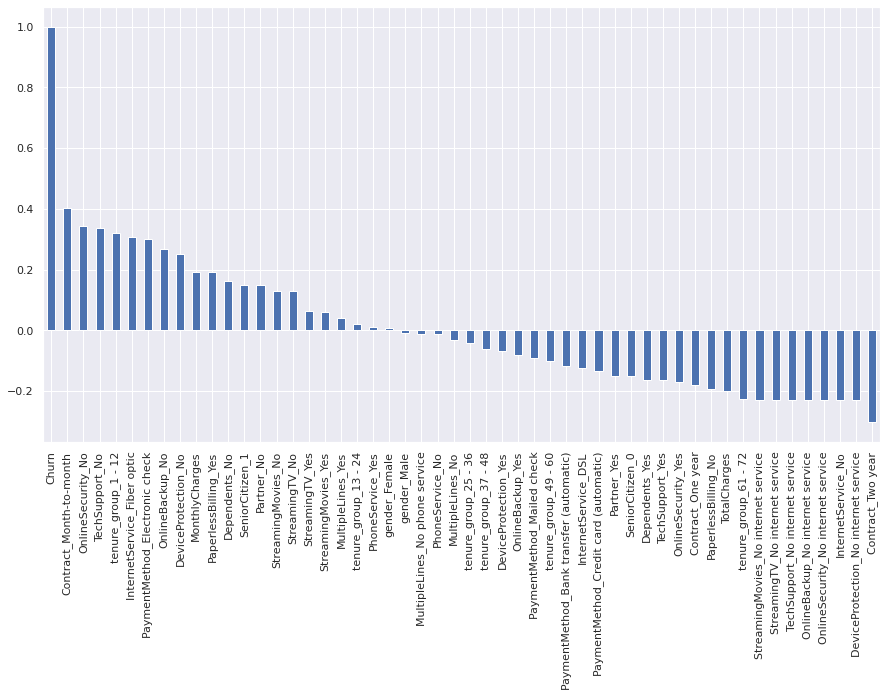

In [20]:
#Get Correlation of "Churn" with other variables:
sns.set(font_scale=1)
plt.figure(figsize=(15,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

1.   High Churn seen for customers with Month to month contracts, No online security, No Tech support,Fibre Optics Internet and during the first year of subscription.
2.   LowChurn is seen in case of Long term contracts,  Subscriptions without internet service and customers engaged for more than 5 years.

Factors like Gender, Availability of PhoneService and # of multiple lines have almost no impact on Churn.

In [21]:
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE

In [22]:
! pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
import scikitplot as skplt
#skplt.metrics.plot_confusion_matrix(y, predictions, normalize=True)

In [24]:
x=telco_data_dummies.drop('Churn',axis=1)

In [25]:
y=telco_data_dummies['Churn']

In [26]:
#model_dt=DecisionTreeClassifier(criterion = "entropy",random_state = 100,max_depth=6, min_samples_leaf=8)
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
# Define the XGBoost classifier
model_xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, max_depth=3, subsample=0.8, colsample_bytree=0.8)

In [27]:
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
n_folds = 5
# Define the stratified k-fold cross validation object
sss = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
accuracy_lst = []
f1_lst = []
auc_lst = []
recall_lst=[]
precision_lst=[]
for train_index, test_index in sss.split(x, y):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), model_xgb) # SMOTE happens during Cross Validation not before..
    pipeline.fit(X_train, y_train)
    prediction = pipeline.predict(X_test)
    accuracy_lst.append(accuracy_score(y_test, prediction))
    precision_lst.append(precision_score(y_test, prediction))
    recall_lst.append(recall_score(y_test, prediction))
    f1_lst.append(f1_score(y_test, prediction))
    auc_lst.append(roc_auc_score(y_test, prediction))


In [28]:
print("Mean Accuracy: ", np.mean(accuracy_lst))
print("Mean Precision: ", np.mean(precision_lst))
print("Mean Recall: ", np.mean(recall_lst))
print("Mean F1-Score: ", np.mean(f1_lst))
print("Mean AUC: ", np.mean(auc_lst))


Mean Accuracy:  0.7957908082024343
Mean Precision:  0.6163950861333232
Mean Recall:  0.6142449570615475
Mean F1-Score:  0.6150758546216689
Mean AUC:  0.7378806188160871


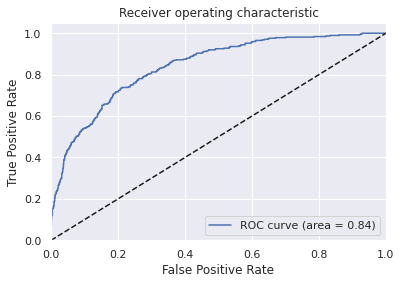

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve,classification_report
# Calculate the ROC curve and AUC value for the test set
y_score = model_xgb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
auc = roc_auc_score(y_test, y_score)
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [30]:
predictions=model_xgb.predict(X_test)

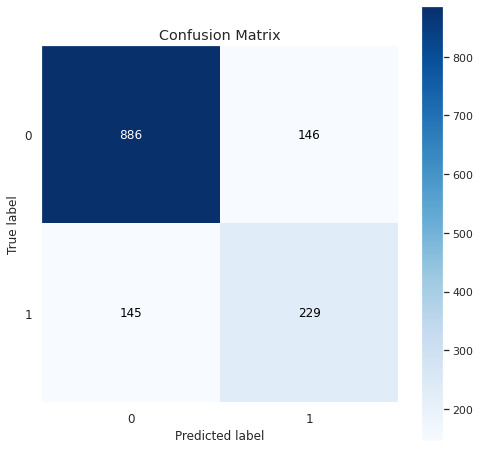

In [31]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize=False)

In [32]:
"""SMOTEENN (Synthetic Minority Over-sampling Technique with Edited Nearest Neighbours) 
is a combination of two popular oversampling methods: SMOTE (Synthetic Minority Over-sampling Technique) and ENN (Edited Nearest Neighbours)"""
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [33]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.3)

In [ ]:
xr_train.columns

In [35]:
model_rf.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

Precision as the name says, says how precise (how sure) is our model in detecting churn while recall is the amount of churn cases our model is able to detect.\
The more precise (selective) our model is, the less cases it will detect.

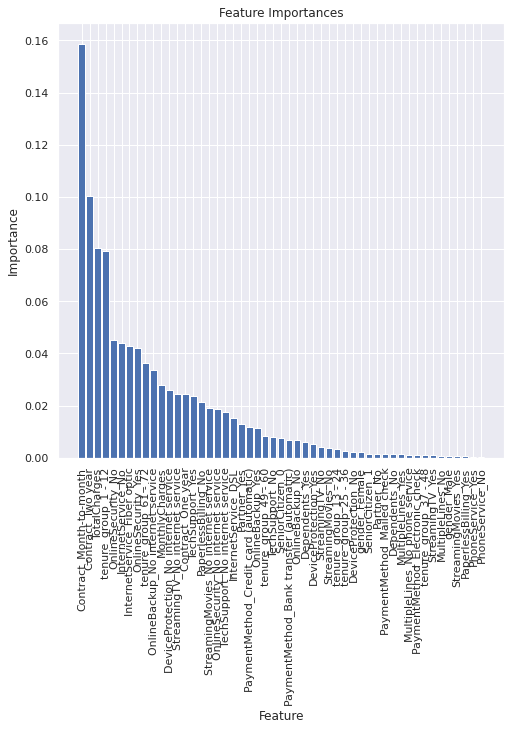

In [41]:

importances = model_rf.feature_importances_

# Get the feature names
feature_names = x.columns

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.bar(range(x.shape[1]), importances[indices])
plt.xticks(range(x.shape[1]), feature_names[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()


In [ ]:
yr_predict = model_rf.predict(xr_test)
score=f1_score(yr_test, yr_predict, average='binary')
print(score)
print(classification_report(yr_test, yr_predict))

0.9393483709273183
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       801
           1       0.91      0.97      0.94       965

    accuracy                           0.93      1766
   macro avg       0.94      0.93      0.93      1766
weighted avg       0.93      0.93      0.93      1766



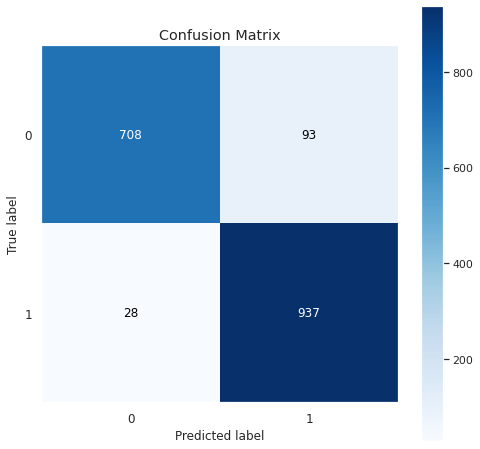

In [ ]:
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(yr_test, yr_predict, normalize=False)

AUC: 0.98


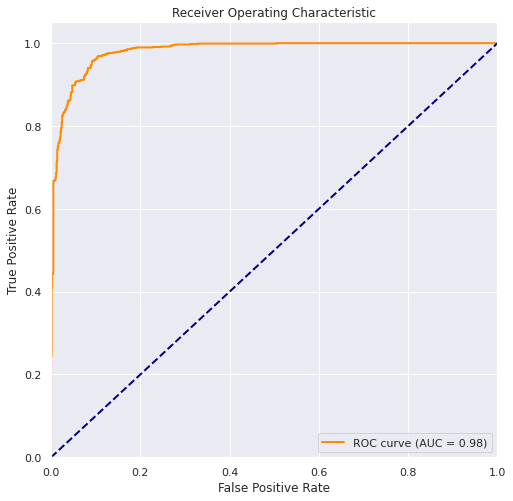

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
# predict the probabilities of the positive class
probs = model_rf.predict_proba(xr_test)[:,1]
# calculate the roc auc score
auc = roc_auc_score(yr_test, probs)
print("AUC: %.2f" % auc)

# plot the ROC curve
fpr, tpr, thresholds = roc_curve(yr_test, probs)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import pickle

In [ ]:
filename = 'model.sav'

In [ ]:
pickle.dump(model_rf,open(filename,'wb'))

In [ ]:
load_model = pickle.load(open(filename, 'rb'))